# Image kernels

In [8]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
from pathlib import Path


# in python script: 
# Path(__file__).parent
current_path = Path().absolute()
print(f"{current_path = }")

data_path = current_path.parent / "data" 

image_path = data_path / "Homer_Simpson_2006.png"

image_path




current_path = PosixPath('/Users/aigineer/Documents/github/Artificial_Intelligence_HA24/code_alongs')


PosixPath('/Users/aigineer/Documents/github/Artificial_Intelligence_HA24/data/Homer_Simpson_2006.png')

In [10]:
image = plt.imread(image_path)
image.shape

(390, 190, 4)

In [37]:
# red channel, green channel
image[:,:,0].shape, image[:,:,1] .shape

((390, 190), (390, 190))

In [40]:
# all rows, all cols, 0-2 channels
image[:,:,:3].shape

(390, 190, 3)

In [43]:
# ellipses operator - picks the rest of the dimensions with ... 
image[...,:3].shape

(390, 190, 3)

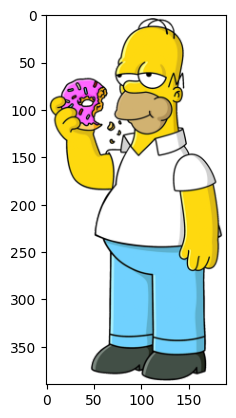

In [11]:
plt.imshow(image)

(array([106282.,   4337.,   7236.,   5694.,  11504.,   1443.,   4160.,
          2741.,  21235.,  57668.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

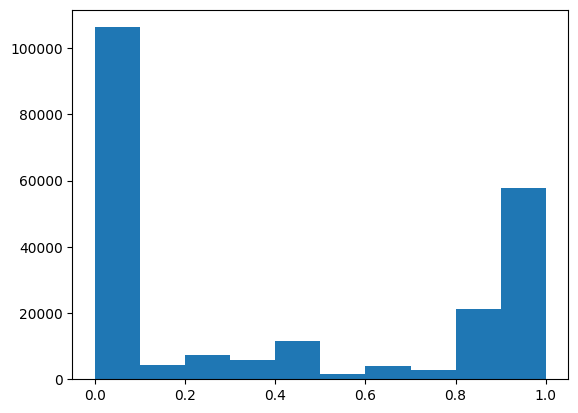

In [46]:
plt.hist(image[...,:3].flatten())

## Resize image

In [48]:
resize_factor = 0.5

# cv2 uses x,y for resizing
new_size = int(image.shape[1] * resize_factor), int(image.shape[0] * resize_factor)
new_size

(95, 195)

In [52]:
resized_image = cv2.resize(image, new_size)
resized_image.shape

(195, 95, 4)

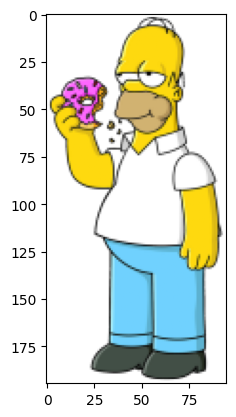

In [53]:
plt.imshow(resized_image)

## Convolve image with filters

In [65]:
edge_filter = np.array([[0, -1, 0],
                        [-1, 4, -1],
                        [0, -1, 0]])

blur_filter = np.array([[.0625, .125, .0625],
                        [.125, .25, .125],
                        [.0625, .125, .0625]])

# adjust the values of the filter and see different effects
outline_filter = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])

filters = [edge_filter, blur_filter, outline_filter]
filter_names = ["Edge", "Blur", "Outline"]

In [55]:
edge_filter

array([[ 0, -1,  0],
       [-1,  4, -1],
       [ 0, -1,  0]])

In [56]:
processed_image_path = data_path / "processed_image"
processed_image_path

PosixPath('/Users/aigineer/Documents/github/Artificial_Intelligence_HA24/data/processed_image')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


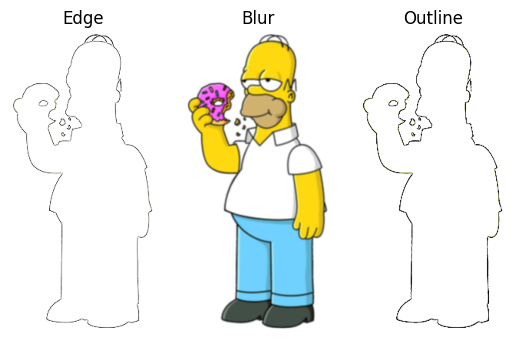

In [66]:
# creates a folder in specified path
processed_image_path.mkdir(exist_ok=True)

fig, axes = plt.subplots(1, len(filters))

for ax, filter_, filter_name in zip(axes, filters, filter_names):
    filtered_image = cv2.filter2D(image, -1, kernel=filter_)
    ax.imshow(filtered_image)
    ax.set_title(f"{filter_name}")
    ax.axis("off")

fig.savefig(processed_image_path / "filtered_images.png")

